# Heart failure machine learning classication


### Import libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd

# data visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

# useful data exploration libraries
from pandas_profiling import ProfileReport
import dabl

2022-04-10 10:33:40,150 [37612] WARNING  py.warnings:109: [JupyterRequire] C:\Users\vinhe\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(



### Understand the data

In [2]:
# view first 5 rows
df = pd.read_csv('data/heart.csv')

In [3]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [4]:
df.shape

(918, 12)

In [7]:
# view data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
# ummary of the numerical features
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [9]:
# find out % of missing values for each column
missing_proportion = df.isnull().sum() / len(df) * 100
missing_proportion

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

2022-04-10 10:35:22,745 [37612] WARNING  py.warnings:109: [JupyterRequire] C:\Users\vinhe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Age


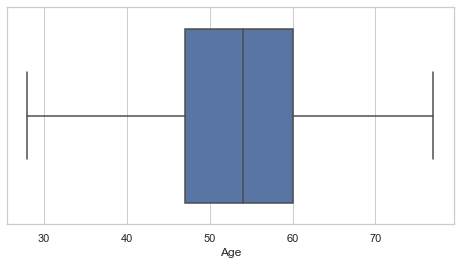

2022-04-10 10:35:23,622 [37612] WARNING  py.warnings:109: [JupyterRequire] C:\Users\vinhe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



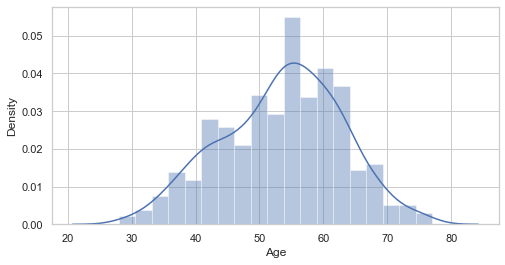

2022-04-10 10:35:24,143 [37612] WARNING  py.warnings:109: [JupyterRequire] C:\Users\vinhe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



RestingBP


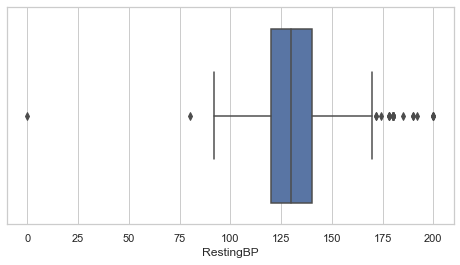

2022-04-10 10:35:24,483 [37612] WARNING  py.warnings:109: [JupyterRequire] C:\Users\vinhe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



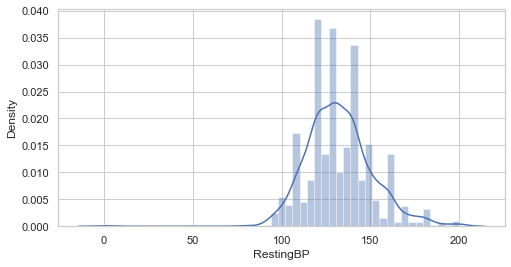

2022-04-10 10:35:25,002 [37612] WARNING  py.warnings:109: [JupyterRequire] C:\Users\vinhe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Cholesterol


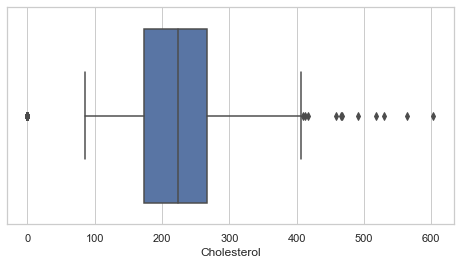

2022-04-10 10:35:25,304 [37612] WARNING  py.warnings:109: [JupyterRequire] C:\Users\vinhe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



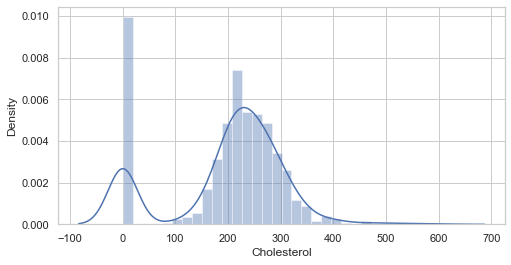

2022-04-10 10:35:25,840 [37612] WARNING  py.warnings:109: [JupyterRequire] C:\Users\vinhe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



FastingBS


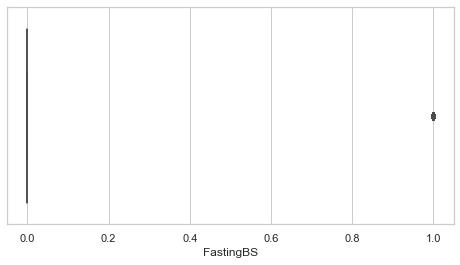

2022-04-10 10:35:26,116 [37612] WARNING  py.warnings:109: [JupyterRequire] C:\Users\vinhe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



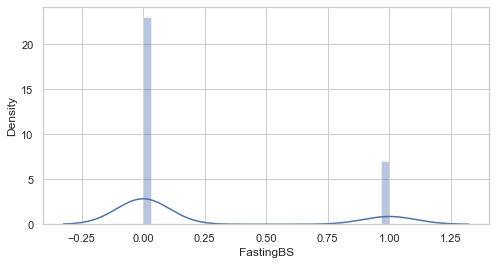

2022-04-10 10:35:26,560 [37612] WARNING  py.warnings:109: [JupyterRequire] C:\Users\vinhe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



MaxHR


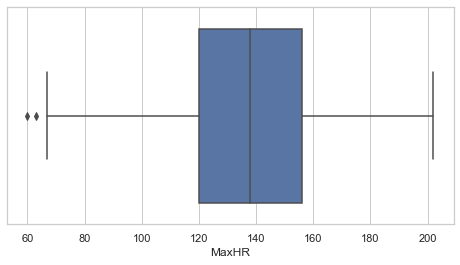

2022-04-10 10:35:26,867 [37612] WARNING  py.warnings:109: [JupyterRequire] C:\Users\vinhe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



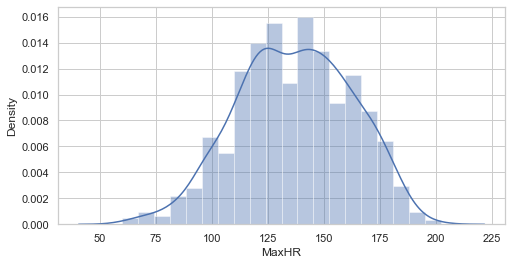

2022-04-10 10:35:27,540 [37612] WARNING  py.warnings:109: [JupyterRequire] C:\Users\vinhe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Oldpeak


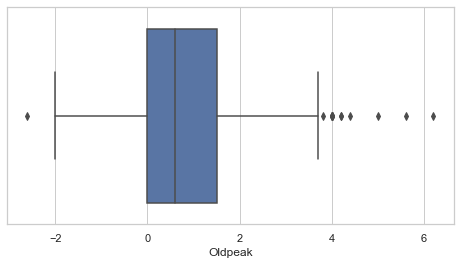

2022-04-10 10:35:27,808 [37612] WARNING  py.warnings:109: [JupyterRequire] C:\Users\vinhe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



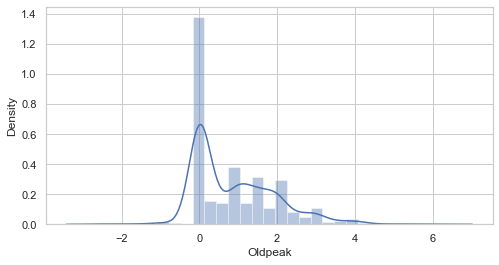

2022-04-10 10:35:28,344 [37612] WARNING  py.warnings:109: [JupyterRequire] C:\Users\vinhe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



HeartDisease


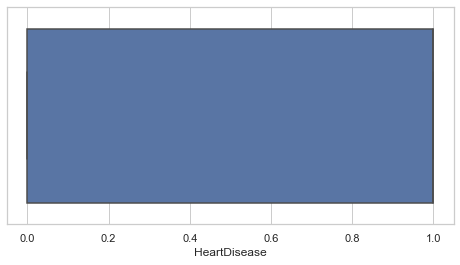

2022-04-10 10:35:28,611 [37612] WARNING  py.warnings:109: [JupyterRequire] C:\Users\vinhe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



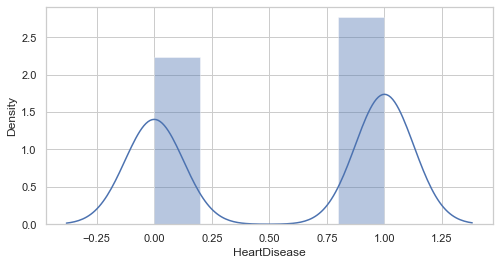

In [10]:
for colname, coltype in df.dtypes.iteritems():
    #print(coltype)
    if (coltype == "float64") or (coltype == "int64"):
        print(colname)
        fig, ax = plt.subplots(figsize=(8,4))
        sns.boxplot(df[colname])
        plt.show()
        
        fig, ax = plt.subplots(figsize=(8,4))
        sns.distplot(df[colname])
        plt.show()

## Quick EDA

In [11]:
profile = ProfileReport(df)

In [12]:
profile

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

2022-04-10 10:46:57,890 [37612] WARNING  py.warnings:109: [JupyterRequire] C:\Users\vinhe\anaconda3\lib\site-packages\dabl\plot\supervised.py:546: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  warnings.warn("The second positional argument of plot is a Series 'y'."



Target looks like classification


2022-04-10 10:46:59,127 [37612] WARNING  py.warnings:109: [JupyterRequire] C:\Users\vinhe\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(

2022-04-10 10:46:59,155 [37612] WARNING  py.warnings:109: [JupyterRequire] C:\Users\vinhe\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(



Linear Discriminant Analysis training set score: 0.751


2022-04-10 10:46:59,178 [37612] WARNING  py.warnings:109: [JupyterRequire] C:\Users\vinhe\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(

2022-04-10 10:46:59,198 [37612] WARNING  py.warnings:109: [JupyterRequire] C:\Users\vinhe\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(

2022-04-10 10:46:59,217 [37612] WARNING  py.warnings:109: [JupyterRequire] C:\Users\vinhe\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(

2022-04-10 10:46:59,237 [37612] WARNING  py.warnings:109: [JupyterRequire] C:\Users\vinhe\anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(



[[<Figure size 1080x1080 with 30 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 432x288 with 1 Axes>],
 None]

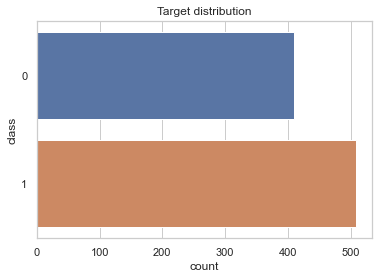

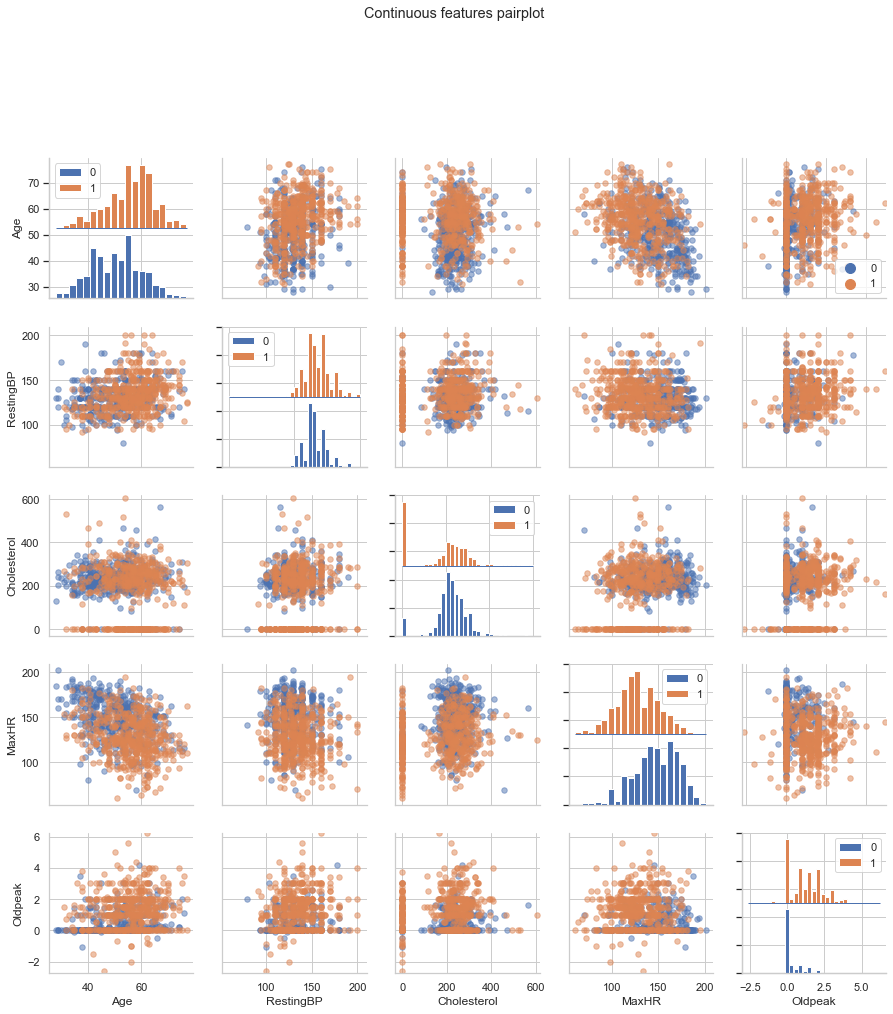

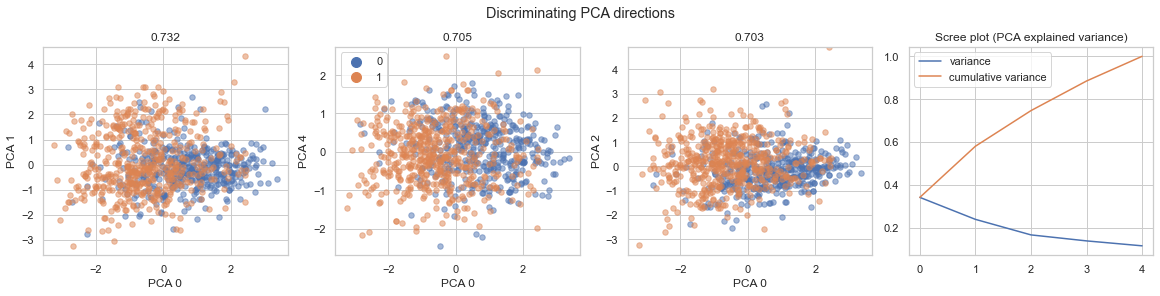

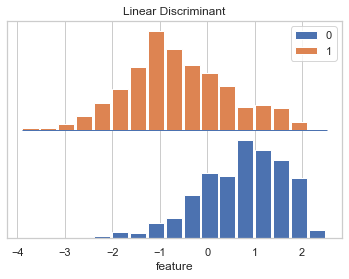

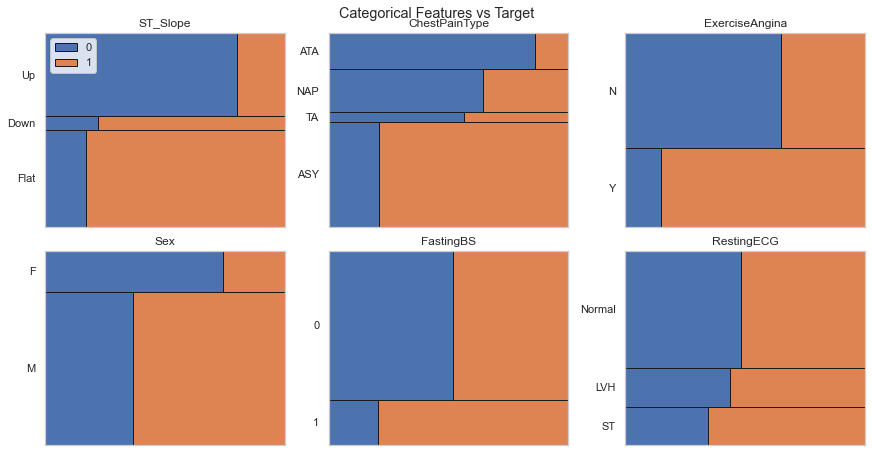

In [13]:
dabl.plot(df, "HeartDisease")